# Lab_13 (Neural Network)
---

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
from matplotlib import rcParams 
rcParams['figure.figsize'] = 15, 5 
sns.set_style('darkgrid')

In [4]:
titanic_data = pd.read_csv('titanic.csv') 
titanic_data.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [5]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_data.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
titanic_data.drop(labels=['PassengerId'], axis=1, inplace=True)

In [8]:
titanic_data.describe()

Survived      Pclass         Age       SibSp       Parch        Fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200

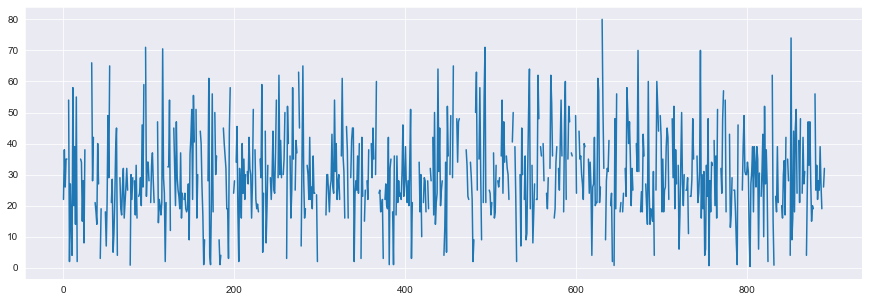

In [9]:
plt.plot(titanic_data["Age"])

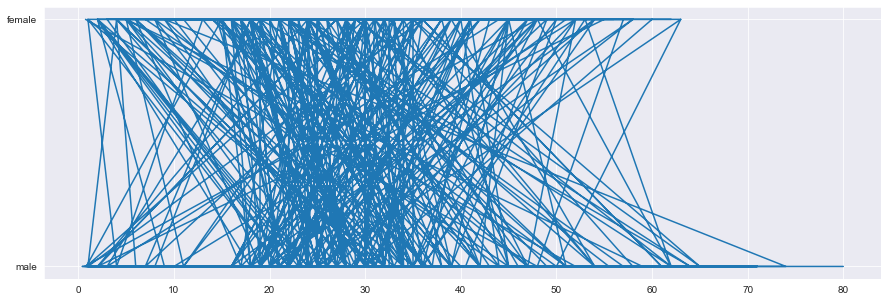

In [10]:
plt.plot(titanic_data["Age"], titanic_data["Sex"])

Since this is a binary variable it would be a good use for logistic regression as this type of display gives no information

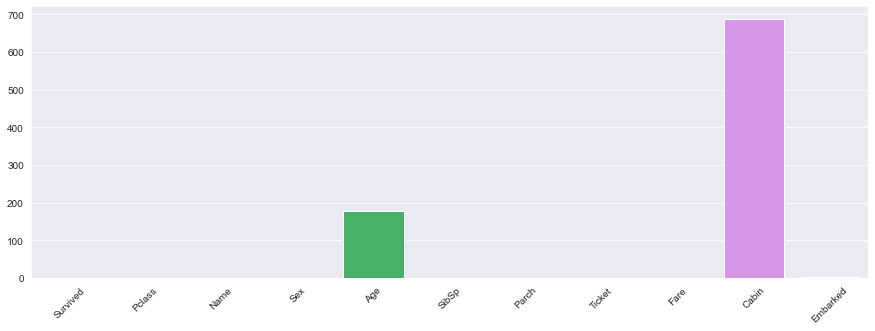

In [11]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values) 
plt.xticks(rotation=45) 
plt.show()

Missing age and cabin values. Age has a small number of nulls so imputation is a good option whereas cabin is missing almost all of the values so we should simply drop the column

In [12]:
titanic_data.isnull()

Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket   Fare  \
0       False   False  False  False  False  False  False   False  False   
1       False   False  False  False  False  False  False   False  False   
2       False   False  False  False  False  False  False   False  False   
3       False   False  False  False  False  False  False   False  False   
4       False   False  False  False  False  False  False   False  False   
..        ...     ...    ...    ...    ...    ...    ...     ...    ...   
886     False   False  False  False  False  False  False   False  False   
887     False   False  False  False  False  False  False   False  False   
888     False   False  False  False   True  False  False   False  False   
889     False   False  False  False  False  False  False   False  False   
890     False   False  False  False  False  False  False   False  False   

     Cabin  Embarked  
0     True     False  
1    False     False  
2     True     False  
3    False     False  
4     True     False  
..     ...       ...  
886   True     False  
887  False     False  
888   True     False  
889  False     False  
890   True     False  

[891 rows x 11 columns]

Returns a dataframe of the same size as our data with a boolean value in each spot indicating if it is null or not

In [13]:
titanic_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

The .sum() postfix takes that boolean dataframe and adds up each column resulting in a single Series 

In [14]:
titanic_data.isnull().sum().values

array([  0,   0,   0,   0, 177,   0,   0,   0,   0, 687,   2], dtype=int64)

.values simply gives us the values of that Series as an array that can be easily plotted or modeled

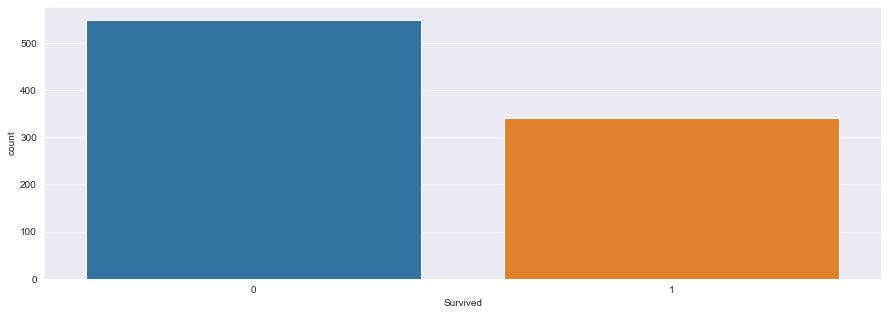

In [15]:
sns.countplot(x=titanic_data['Survived']) 
plt.show()

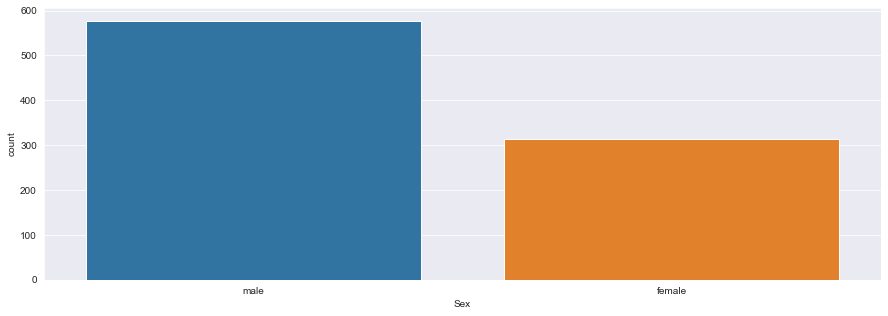

In [16]:
sns.countplot(x=titanic_data['Sex'])
plt.show()

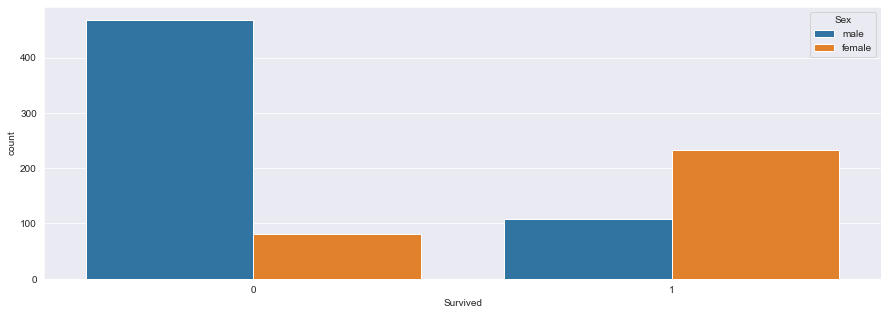

In [17]:
sns.countplot(x=titanic_data['Survived'], hue='Sex', data=titanic_data) 
plt.show() 

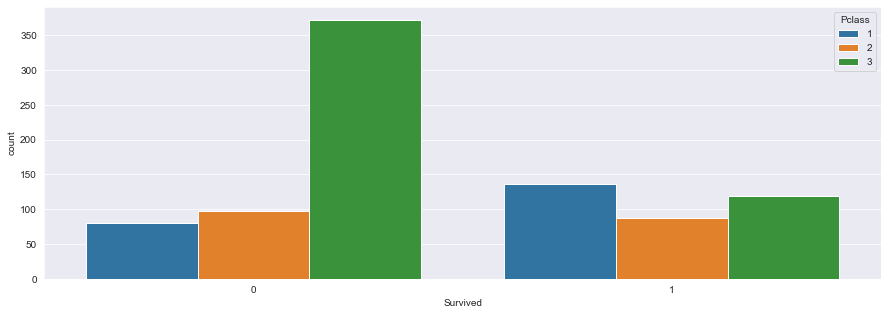

In [18]:
sns.countplot(x=titanic_data['Survived'], hue='Pclass', data=titanic_data) 
plt.show()

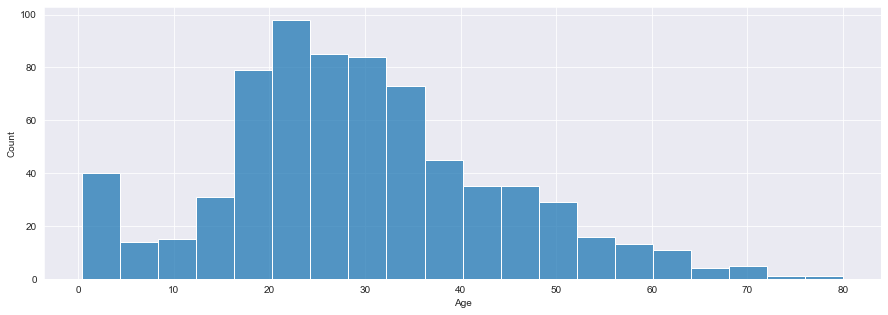

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [19]:
sns.histplot(x=titanic_data['Age'].dropna()) 
plt.show() 
titanic_data['Age'].describe()

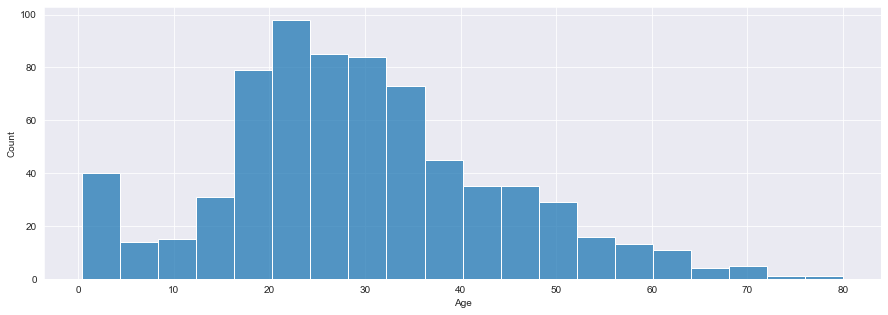

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [20]:
sns.histplot(x=titanic_data['Age'])
#Even without dropping nulls sns.histplot only plots non null values
plt.show()
titanic_data['Age'].describe()

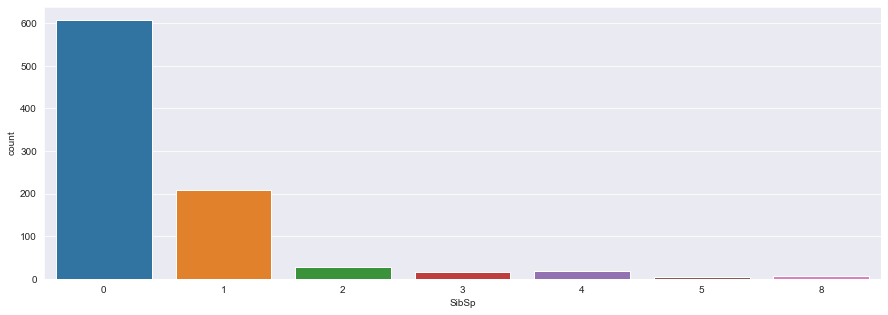

In [21]:
sns.countplot(x=titanic_data['SibSp']) 
plt.show()

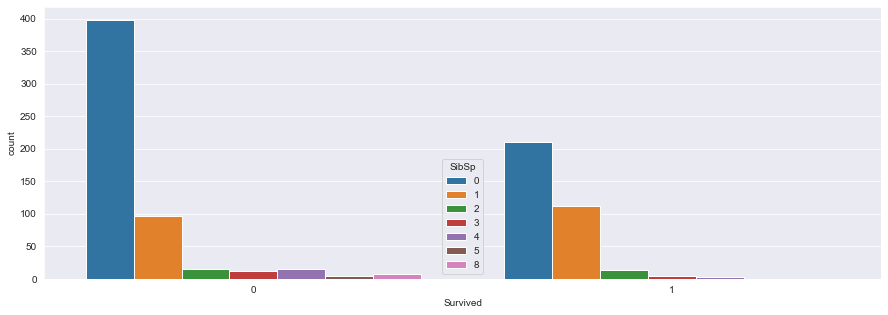

In [22]:
sns.countplot(x=titanic_data['Survived'], hue='SibSp', data=titanic_data)
plt.show()

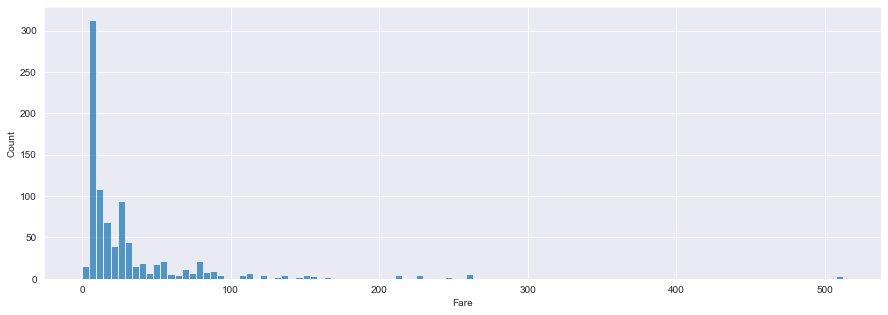

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
sns.histplot(x=titanic_data['Fare']) 
plt.show() 
titanic_data['Fare'].describe()

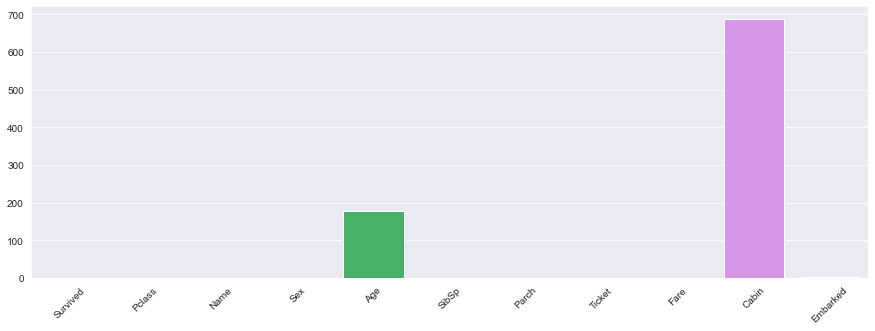

In [24]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values) 
plt.xticks(rotation=45) 
plt.show()

In [25]:
mean_age = int(titanic_data['Age'].mean()) 
titanic_data['Age'] = titanic_data['Age'].apply(lambda age : mean_age if pd.isnull(age) else age) 

Imputing our data with a lambda function

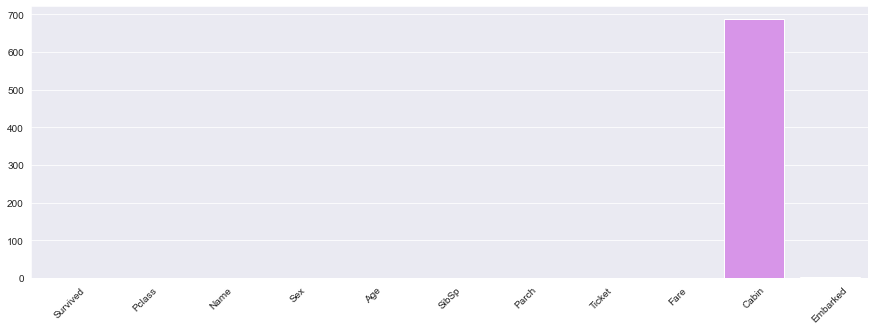

In [26]:
sns.barplot(x=titanic_data.columns, y=titanic_data.isnull().sum().values) 
plt.xticks(rotation=45) 
plt.show()

In [27]:
titanic_data.drop(labels=['Cabin'], axis=1, inplace=True) 
titanic_data.dropna(inplace=True)

In [28]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Name      889 non-null    object 
 3   Sex       889 non-null    object 
 4   Age       889 non-null    float64
 5   SibSp     889 non-null    int64  
 6   Parch     889 non-null    int64  
 7   Ticket    889 non-null    object 
 8   Fare      889 non-null    float64
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 76.4+ KB


In [29]:
titanic_data = pd.get_dummies(data=titanic_data, columns=['Sex', 'Embarked'], drop_first=True) 
titanic_data.drop(labels=['Name','Ticket'], axis=1, inplace=True)

In [30]:
titanic_data.head()

Survived  Pclass   Age  SibSp  Parch     Fare  Sex_male  Embarked_Q  \
0         0       3  22.0      1      0   7.2500         1           0   
1         1       1  38.0      1      0  71.2833         0           0   
2         1       3  26.0      0      0   7.9250         0           0   
3         1       1  35.0      1      0  53.1000         0           0   
4         0       3  35.0      0      0   8.0500         1           0   

   Embarked_S  
0           1  
1           0  
2           1  
3           1  
4           1

In [33]:
from sklearn.model_selection import train_test_split 
 
X = titanic_data[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare','Sex_male', 'Embarked_Q', 
                        'Embarked_S']] 
y = titanic_data['Survived'] 
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [34]:
from sklearn.neural_network import MLPClassifier 
 
mlp = MLPClassifier(max_iter=500, activation='relu') 
mlp.fit(X_train,y_train) 

MLPClassifier(max_iter=500)

Creating our neural network model. I previously dropped the passenger id column because I don't see it being relevant to the survival rate

In [35]:
predictions = mlp.predict(X_test)

In [36]:
from sklearn.metrics import classification_report, confusion_matrix 
 
print(confusion_matrix(y_test,predictions)) 
print(classification_report(y_test,predictions)) 

[[135  38]
 [ 24  70]]
              precision    recall  f1-score   support

           0       0.85      0.78      0.81       173
           1       0.65      0.74      0.69        94

    accuracy                           0.77       267
   macro avg       0.75      0.76      0.75       267
weighted avg       0.78      0.77      0.77       267



In [37]:
mlp2 = MLPClassifier(max_iter=3000, activation='logistic', hidden_layer_sizes=(1000,900)) 
mlp2.fit(X_train,y_train) 
 
predictions2 = mlp2.predict(X_test) 
 
print(confusion_matrix(y_test,predictions2)) 
print(classification_report(y_test,predictions2))

[[141  32]
 [ 31  63]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82       173
           1       0.66      0.67      0.67        94

    accuracy                           0.76       267
   macro avg       0.74      0.74      0.74       267
weighted avg       0.76      0.76      0.76       267



This iteration is not noticably better

In [38]:
mlp2 = MLPClassifier(max_iter=5000, activation='logistic', hidden_layer_sizes=(2000,1500)) 
mlp2.fit(X_train,y_train) 
 
predictions2 = mlp2.predict(X_test) 
 
print(confusion_matrix(y_test,predictions2)) 
print(classification_report(y_test,predictions2))

[[136  37]
 [ 30  64]]
              precision    recall  f1-score   support

           0       0.82      0.79      0.80       173
           1       0.63      0.68      0.66        94

    accuracy                           0.75       267
   macro avg       0.73      0.73      0.73       267
weighted avg       0.75      0.75      0.75       267



In [39]:
mlp2 = MLPClassifier(max_iter=3000, activation='identity', hidden_layer_sizes=(1000,900)) 
mlp2.fit(X_train,y_train) 
 
predictions2 = mlp2.predict(X_test) 
 
print(confusion_matrix(y_test,predictions2)) 
print(classification_report(y_test,predictions2))

[[151  22]
 [ 56  38]]
              precision    recall  f1-score   support

           0       0.73      0.87      0.79       173
           1       0.63      0.40      0.49        94

    accuracy                           0.71       267
   macro avg       0.68      0.64      0.64       267
weighted avg       0.70      0.71      0.69       267



Identity does not seem to be the best choice for activation function. I hypothesize that identity will produce the best result on this data set due to it's binary outcome variable

In [40]:
mlp2 = MLPClassifier(max_iter=5000, activation='tanh', hidden_layer_sizes=(2000,1800)) 
mlp2.fit(X_train,y_train) 
 
predictions2 = mlp2.predict(X_test) 
 
print(confusion_matrix(y_test,predictions2)) 
print(classification_report(y_test,predictions2))

[[153  20]
 [ 32  62]]
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       173
           1       0.76      0.66      0.70        94

    accuracy                           0.81       267
   macro avg       0.79      0.77      0.78       267
weighted avg       0.80      0.81      0.80       267



This one seems to be better. I used tanh and a very large number of iterations and hidden layers which takes a long time to compute